In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
from Classification import model_fit, plot_confusion_matrix, model_fit2, plot_prob, get_precision_recall
from PlottingFunction import lda_1Dplot, plotModel, data_1Dplot

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
heartPCA = pd.read_csv('PCAData.csv')
heartPCA.drop(['Unnamed: 0'],axis=1, inplace=True)
heartPCA['num'] = heart.num
heartPCA.shape

(720, 14)

In [7]:
heartICA = pd.read_csv('ICAData.csv')
heartICA.drop(['Unnamed: 0'],axis=1, inplace=True)
heartICA['num'] = heart.num
heartICA.shape

(720, 14)

In [8]:
heartFactor = pd.read_csv('FactorData.csv')
heartFactor.drop(['Unnamed: 0'],axis=1, inplace=True)
heartFactor['num'] = heart.num
heartFactor.shape

(720, 14)

In [9]:
svc = svm.SVC()
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [10]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()
XPCA = heartPCA.drop(['num'],axis=1).copy()
YPCA = heartPCA.num.copy()
XICA = heartICA.drop(['num'],axis=1).copy()
YICA = heartICA.num.copy()
XFactor = heartFactor.drop(['num'],axis=1).copy()
YFactor = heartFactor.num.copy()

In [11]:
SC = StandardScaler()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.33, stratify=Y)
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(SC.fit_transform(X),Y,test_size= 0.33, stratify=Y)
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(XPCA, YPCA, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)
X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA = train_test_split(XICA, YICA, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)
X_train_F, X_test_F, Y_train_F, Y_test_F = train_test_split(XFactor, YFactor, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)

In [13]:
svc = svm.SVC()
model_fit2(svc, X_train, X_test, Y_train, Y_test)

SVC

Train score is :0.556
Test score is :0.571


In [14]:
svc = svm.SVC()
model_fit2(svc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

SVC

Train score is :0.763
Test score is :0.655


In [15]:
svc = svm.SVC()
model_fit2(svc, X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA)

SVC

Train score is :0.571
Test score is :0.571


In [16]:
svc = svm.SVC()
model_fit2(svc, X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA)

SVC

Train score is :0.774
Test score is :0.676


In [17]:
svc = svm.SVC()
model_fit2(svc, X_train_F, X_test_F, Y_train_F, Y_test_F)

SVC

Train score is :0.722
Test score is :0.676


In [18]:
C = [10.0**i for i in np.arange(-5,5,0.5)]
kernel = ['poly', 'rbf']
random_state = 144

In [19]:
svc_grid = svm.SVC(probability=True)
svc_grid.set_params(max_iter = 1e5, random_state = 144)
param_grid = {'C':C, 'kernel':kernel}
svc_grid = GridSearchCV(svc_grid, param_grid, cv = 3, return_train_score=True)
%time svc_grid.fit(X_train_scaled, Y_train_scaled)

CPU times: total: 6.27 s
Wall time: 6.28 s


GridSearchCV(cv=3,
             estimator=SVC(max_iter=100000.0, probability=True,
                           random_state=144),
             param_grid={'C': [1e-05, 3.1622776601683795e-05, 0.0001,
                               0.00031622776601683794, 0.001,
                               0.0031622776601683794, 0.01, 0.03162277660168379,
                               0.1, 0.31622776601683794, 1.0,
                               3.1622776601683795, 10.0, 31.622776601683793,
                               100.0, 316.22776601683796, 1000.0,
                               3162.2776601683795, 10000.0,
                               31622.776601683792],
                         'kernel': ['poly', 'rbf']},
             return_train_score=True)

In [20]:
svc_grid_PCA = svm.SVC(probability=True)
svc_grid_PCA.set_params(max_iter = 1e5, random_state = 144)
param_grid = {'C':C, 'kernel':kernel}
svc_grid_PCA = GridSearchCV(svc_grid_PCA, param_grid, cv = 3, return_train_score=True)
%time svc_grid_PCA.fit(X_train_PCA, Y_train_PCA)

CPU times: total: 39.7 s
Wall time: 40 s


GridSearchCV(cv=3,
             estimator=SVC(max_iter=100000.0, probability=True,
                           random_state=144),
             param_grid={'C': [1e-05, 3.1622776601683795e-05, 0.0001,
                               0.00031622776601683794, 0.001,
                               0.0031622776601683794, 0.01, 0.03162277660168379,
                               0.1, 0.31622776601683794, 1.0,
                               3.1622776601683795, 10.0, 31.622776601683793,
                               100.0, 316.22776601683796, 1000.0,
                               3162.2776601683795, 10000.0,
                               31622.776601683792],
                         'kernel': ['poly', 'rbf']},
             return_train_score=True)

In [24]:
svc_grid_ICA = svm.SVC(probability=True)
svc_grid_ICA.set_params(max_iter = 1e5, random_state = 144)
param_grid = {'C':C, 'kernel':kernel}
svc_grid_ICA = GridSearchCV(svc_grid_ICA, param_grid, cv = 3, return_train_score=True)
%time svc_grid_ICA.fit(X_train_ICA, Y_train_ICA)

CPU times: total: 6.56 s
Wall time: 6.64 s


GridSearchCV(cv=3,
             estimator=SVC(max_iter=100000.0, probability=True,
                           random_state=144),
             param_grid={'C': [1e-05, 3.1622776601683795e-05, 0.0001,
                               0.00031622776601683794, 0.001,
                               0.0031622776601683794, 0.01, 0.03162277660168379,
                               0.1, 0.31622776601683794, 1.0,
                               3.1622776601683795, 10.0, 31.622776601683793,
                               100.0, 316.22776601683796, 1000.0,
                               3162.2776601683795, 10000.0,
                               31622.776601683792],
                         'kernel': ['poly', 'rbf']},
             return_train_score=True)

In [25]:
svc_grid_Factor = svm.SVC(probability=True)
svc_grid_Factor.set_params(max_iter = 1e5, random_state = 144)
param_grid = {'C':C, 'kernel':kernel}
svc_grid_Factor = GridSearchCV(svc_grid_Factor, param_grid, cv = 3, return_train_score=True)
%time svc_grid_Factor.fit(X_train_F, Y_train_F)

CPU times: total: 8.95 s
Wall time: 9.01 s


GridSearchCV(cv=3,
             estimator=SVC(max_iter=100000.0, probability=True,
                           random_state=144),
             param_grid={'C': [1e-05, 3.1622776601683795e-05, 0.0001,
                               0.00031622776601683794, 0.001,
                               0.0031622776601683794, 0.01, 0.03162277660168379,
                               0.1, 0.31622776601683794, 1.0,
                               3.1622776601683795, 10.0, 31.622776601683793,
                               100.0, 316.22776601683796, 1000.0,
                               3162.2776601683795, 10000.0,
                               31622.776601683792],
                         'kernel': ['poly', 'rbf']},
             return_train_score=True)

In [26]:
svc_df = pd.DataFrame(svc_grid.cv_results_)
svc_PCA_df = pd.DataFrame(svc_grid_PCA.cv_results_)
svc_ICA_df = pd.DataFrame(svc_grid_ICA.cv_results_)
svc_F_df = pd.DataFrame(svc_grid_Factor.cv_results_)

In [27]:
svc_df.dropna(axis=0,how='any',inplace=True)
svc_PCA_df.dropna(axis=0,how='any',inplace=True)
svc_ICA_df.dropna(axis=0,how='any',inplace=True)
svc_F_df.dropna(axis=0,how='any',inplace=True)

In [28]:
svc_final_df = svc_df.loc[:,['param_C','param_kernel','mean_train_score','mean_test_score']]
svc_final_PCA_df = svc_PCA_df.loc[:,['param_C','param_kernel','mean_train_score','mean_test_score']]
svc_final_ICA_df = svc_ICA_df.loc[:,['param_C','param_kernel','mean_train_score','mean_test_score']]
svc_final_F_df = svc_F_df.loc[:,['param_C','param_kernel','mean_train_score','mean_test_score']]

In [29]:
svc_final_df.to_csv('SVRCV.csv')
svc_final_PCA_df.to_csv('SVRCVPCA.csv')
svc_final_ICA_df.to_csv('SVRCVICA.csv')
svc_final_F_df.to_csv('SVRCVF.csv')

In [30]:
svc_final_df.loc[:,['mean_train_score','mean_test_score']].max()

mean_train_score    1.000000
mean_test_score     0.616278
dtype: float64

In [31]:
svc_final_PCA_df.loc[:,['mean_train_score','mean_test_score']].max()

mean_train_score    0.985465
mean_test_score     0.582932
dtype: float64

In [32]:
svc_final_ICA_df.loc[:,['mean_train_score','mean_test_score']].max()

mean_train_score    1.000000
mean_test_score     0.616084
dtype: float64

In [33]:
svc_final_F_df.loc[:,['mean_train_score','mean_test_score']].max()

mean_train_score    1.000000
mean_test_score     0.638923
dtype: float64

In [34]:
svc_grid.best_estimator_.get_params()

{'C': 0.31622776601683794,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 100000.0,
 'probability': True,
 'random_state': 144,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [35]:
print('Training score is :' + str(np.round(svc_grid.best_estimator_.score(X_train_scaled, Y_train),2)))
print('Testing  score is :' + str(np.round(svc_grid.best_estimator_.score(X_test_scaled, Y_test),2)))

Training score is :0.38
Testing  score is :0.49


In [36]:
svc_grid.best_estimator_.n_support_

array([129, 128,  46,  43,  12])

In [37]:
svc = svm.SVC()
svc.set_params(C = 0.05, kernel = 'poly', max_iter = 1e5, degree = 1, probability = True, random_state = 144, gamma = 0.8)
model_fit2(svc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

SVC

Train score is :0.66
Test score is :0.664


In [38]:
svc = svm.SVC()
svc.set_params(C = 0.05, kernel = 'poly', max_iter = 1e5, degree = 1, probability = True, random_state = 144, gamma = 0.8)
model_fit2(svc, X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA)

SVC

Train score is :0.658
Test score is :0.626


In [39]:
svc = svm.SVC()
svc.set_params(C = 0.05, kernel = 'poly', max_iter = 1e5, degree = 1, probability = True, random_state = 144, gamma = 0.8)
model_fit2(svc, X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA)

SVC

Train score is :0.658
Test score is :0.639


In [40]:
svc = svm.SVC()
svc.set_params(C = 0.05, kernel = 'poly', max_iter = 1e5, degree = 1, probability = True, random_state = 144, gamma = 0.8)
model_fit2(svc, X_train_F, X_test_F, Y_train_F, Y_test_F)

SVC

Train score is :0.647
Test score is :0.643


SVC


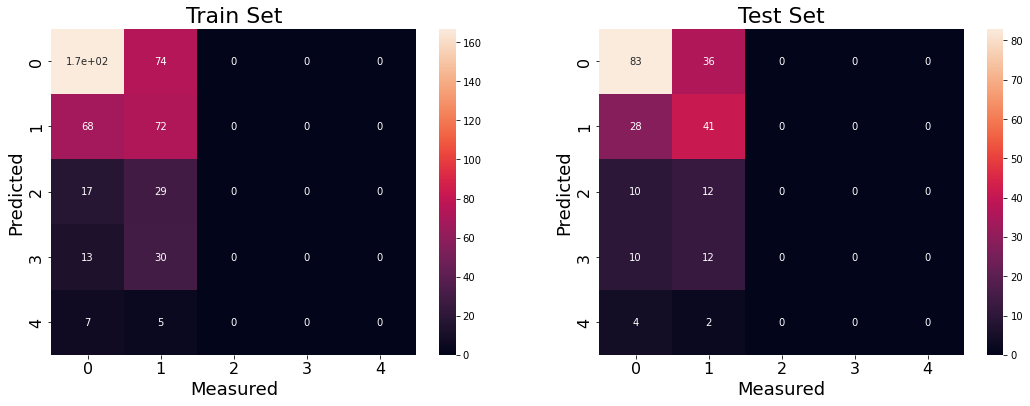

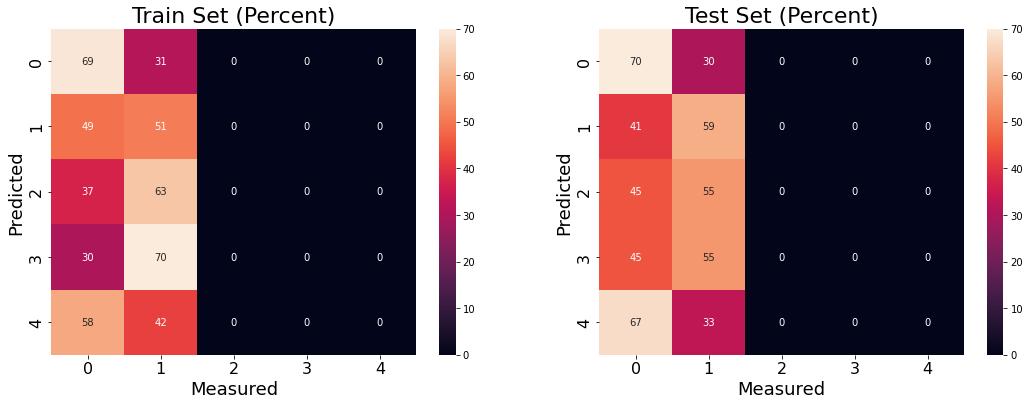

In [41]:
plot_confusion_matrix(svc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

Precision score for training set is :0.61
Precision score for testing  set is :0.61
Recall score for training set is :0.69
Recall score for testing  set is :0.7
F1 score for training set is :0.65
F1 score for testing  set is :0.65
AUC for training set is :0.88
AUC for testing  set is :0.91


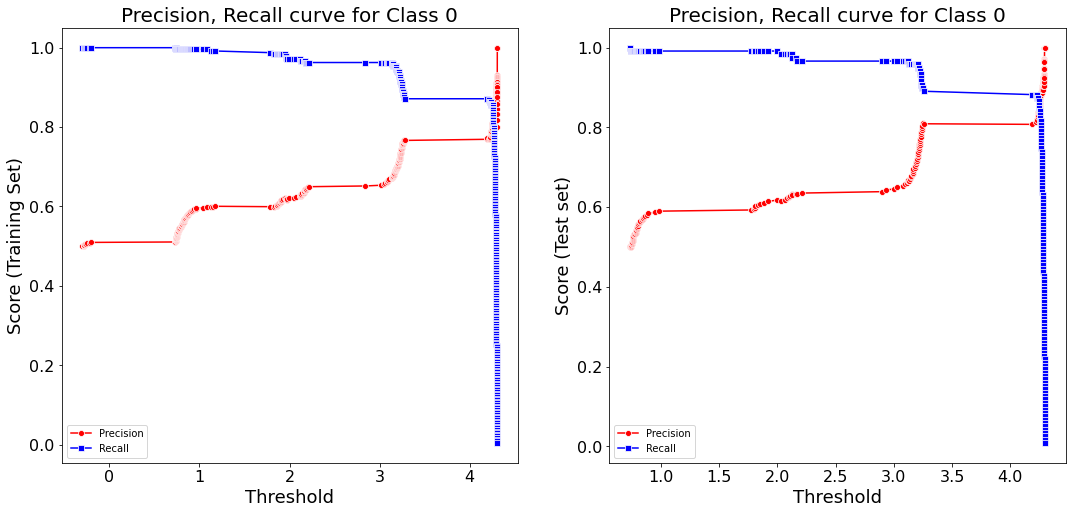

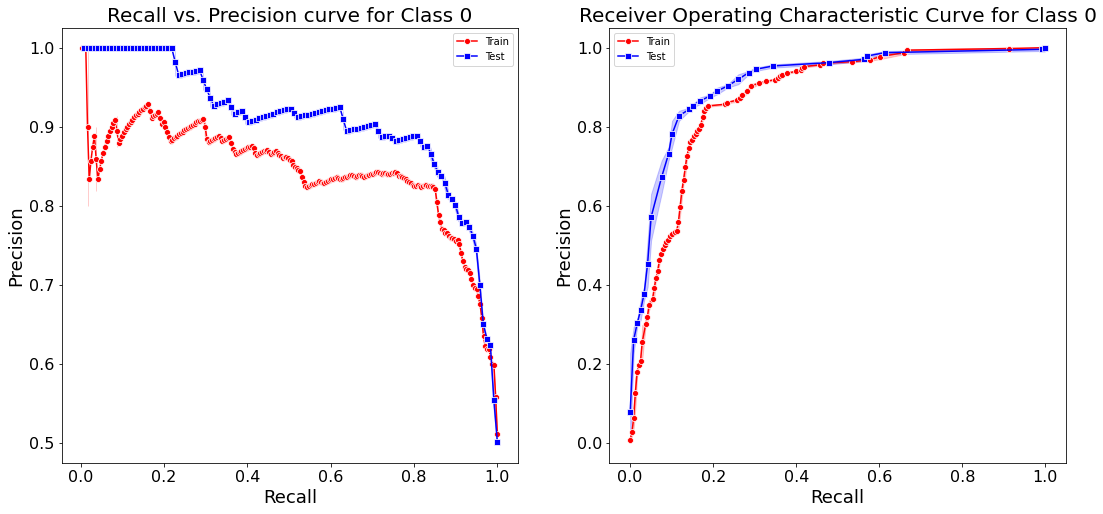

In [42]:
get_precision_recall(svc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled, 0)

Precision score for training set is :0.0
Precision score for testing  set is :0.0
Recall score for training set is :0.0
Recall score for testing  set is :0.0
F1 score for training set is :0.0
F1 score for testing  set is :0.0
AUC for training set is :0.76
AUC for testing  set is :0.76


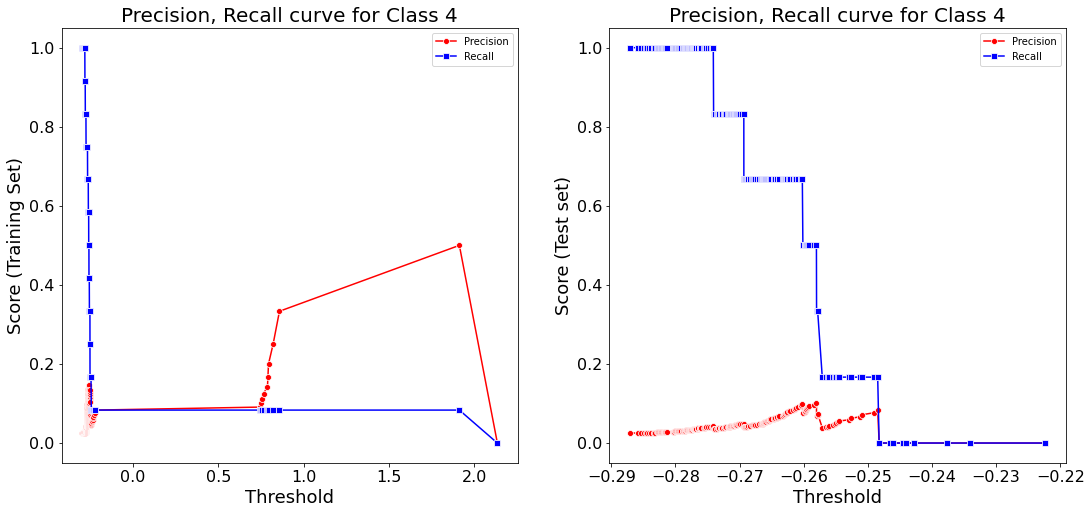

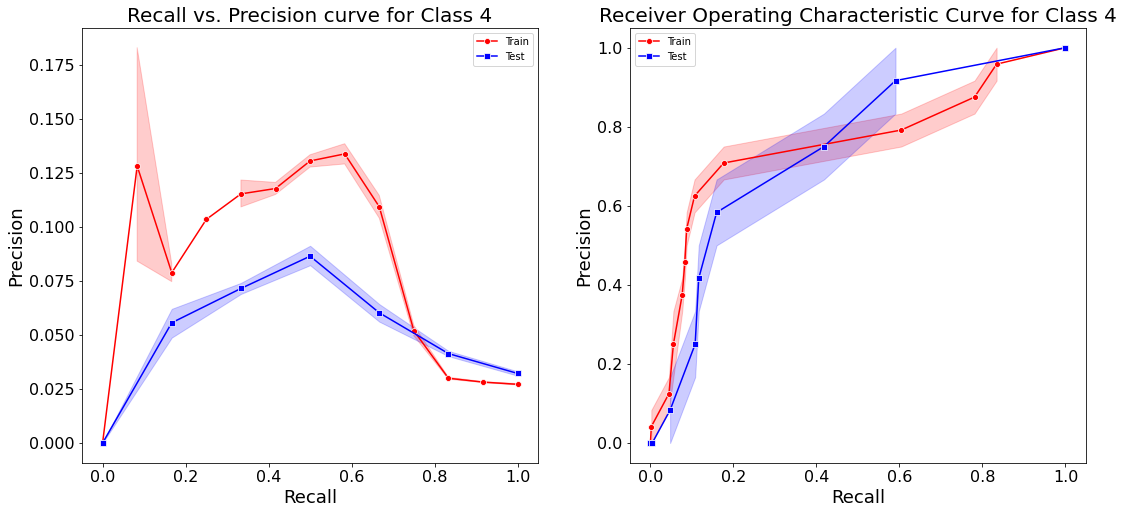

In [43]:
get_precision_recall(svc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled, 4)